# Santander Bikes EDA

In [95]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
plt.style.use("dark_background")
plt.rcParams['figure.dpi'] = 150

In [102]:
bike_data = pd.read_csv("../data/processed_df.csv", index_col=0)
bike_data.head()

,start_id,end_id,start_time,duration,end_time,dist
1,103,37,47260920,360,47261280,1.458333
2,39,539,47260920,120,47261040,0.545517
3,785,785,47260920,300,47261220,0.000000
4,341,159,47260980,1800,47262780,1.092775
5,708,573,47260980,1080,47262060,3.607290


In [101]:
station_data = pd.read_csv("../data/santander_locations.csv")
station_data.head()

,Station.Id,StationName,longitude,latitude,Easting,Northing
0,1,"River Street, Clerkenwell",-0.109971,51.5292,531202.520,182832.020
1,2,"Phillimore Gardens, Kensington",-0.197574,51.4996,525207.070,179391.860
2,3,"Christopher Street, Liverpool Street",-0.084606,51.5213,532984.810,182001.530
3,4,"St. Chad's Street, King's Cross",-0.120974,51.5301,530436.760,182911.990
4,5,"Sedding Street, Sloane Square",-0.156876,51.4931,528051.649,178742.097


## Bike Journey EDA

In [103]:
duration = bike_data.duration
dist = bike_data.dist

mean_duration = duration.mean()
mean_dist = dist.mean()

mode_duration = duration.mode().get(0)
mode_dist = dist.mode().get(0)

median_duration = duration.median()
median_dist = dist.median()

duration_std = duration.std()
dist_std = dist.std()

max_duration = duration.max()
max_dist = dist.max()

min_duration = duration.min()
min_dist = dist.min()


In [104]:
print("The mean duration of a bike ride is " + str(round(mean_duration, 2)) + "s, or " + str(round(mean_duration / 60, 2)) + " min")
print("The mean distance of a bike ride is " + str(round(mean_dist, 2)) + "Km")
print("\n")
print("The standard deviation of the duration of a bike ride is " + str(round(duration_std, 2)) + "s, or " + str(round(duration_std / 60, 2)) + " min")
print("The standard deviation of the distance of a bike ride is " + str(round(dist_std, 2)) + "Km")
print("\n")
print("The mode duration of a bike ride is " + str(round(mode_duration, 2)) + "s, or " + str(round(mode_duration / 60, 2)) + " min")
print("The mode distance of a bike ride is " + str(round(mode_dist, 2)) + "Km")
print("\n")
print("The median duration of a bike ride is " + str(round(median_duration, 2)) + "s, or " + str(round(median_duration / 60, 2)) + " min")
print("The median distance of a bike ride is " + str(round(median_dist, 2)) + "Km")
print("\n")
print("The longest bike ride took " + str(round(max_duration, 2)) + "s, which is or " + str(round(max_duration / 60, 2)) + " min or " + str(round(max_duration / (60**2), 2)) + " hours, which is about " + str(round(max_duration / (60**2*24), 2)) + " days!")
print("The longest distance travelled between stations bike ride was " + str(round(max_dist, 2)) + "Km")
print("\n")
print("The shortest bike ride took " + str(round(min_duration, 2)) + "s")
print("The shortest distance travelled between stations was " + str(round(min_dist, 2)) + "Km, corresponding to renting and docking a bike at the same station")

The mean duration of a bike ride is 1423.41s, or 23.72 min
The mean distance of a bike ride is 2.28Km


The standard deviation of the duration of a bike ride is 4067.3s, or 67.79 min
The standard deviation of the distance of a bike ride is 1.67Km


The mode duration of a bike ride is 660s, or 11.0 min
The mode distance of a bike ride is 0.0Km


The median duration of a bike ride is 960.0s, or 16.0 min
The median distance of a bike ride is 1.96Km


The longest bike ride took 565980s, which is or 9433.0 min or 157.22 hours, which is about 6.55 days!
The longest distance travelled between stations bike ride was 16.75Km


The shortest bike ride took 60s
The shortest distance travelled between stations was 0.0Km, corresponding to renting and docking a bike at the same station


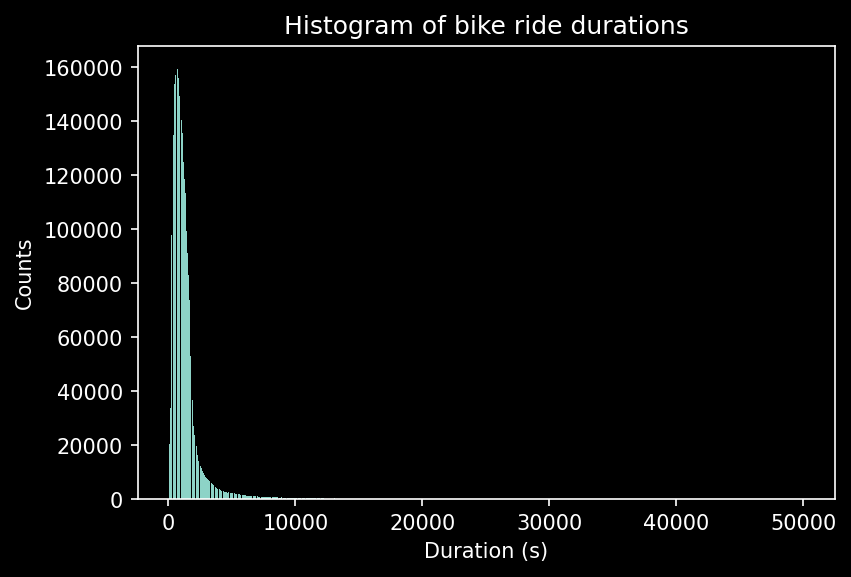

In [83]:
plt.figure(1)
plt.title("Histogram of bike ride durations")
plt.xlabel("Duration (s)")
plt.ylabel("Counts")
plt.hist(duration, bins=1000 ,range=(duration.min(), 50000))
plt.show()

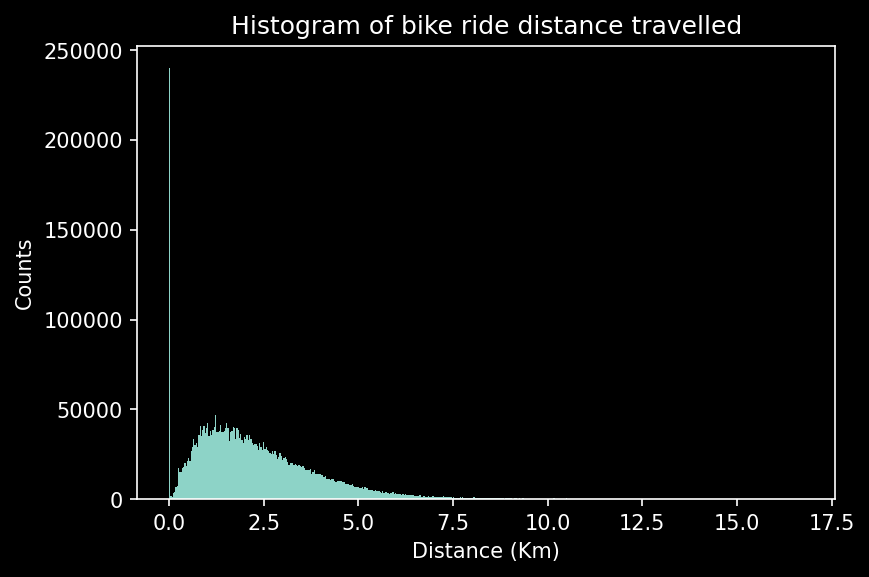

In [93]:
plt.figure(1)
plt.xlabel("Distance (Km)")
plt.ylabel("Counts")
plt.title("Histogram of bike ride distance travelled")
b,n,d = plt.hist(dist, bins=500 )
plt.show()

## Station EDA

In [147]:
class IdError(IndexError):
    pass

def get_station_name(in_id):
    try:
        return station_data[station_data["Station.Id"] == in_id].StationName.iloc[0]
    except IndexError:
        IdError("No station matching input ID")

In [153]:
start_stations = bike_data.start_id
end_stations = bike_data.end_id

pop_start_stat = start_stations.mode().get(0)
pop_end_stat = end_stations.mode().get(0)

print("The most popular starting station is " + get_station_name(pop_end_stat) + ", which is also the most popular end station")


The most popular starting station is Hyde Park Corner, Hyde Park, which is also the most popular end station


0        1
1        2
2        3
3        4
4        5
      ... 
803    840
804    841
805    842
806    844
807    845
Name: Station.Id, Length: 808, dtype: int64